1/1 [==============================] - 0s 47ms/step


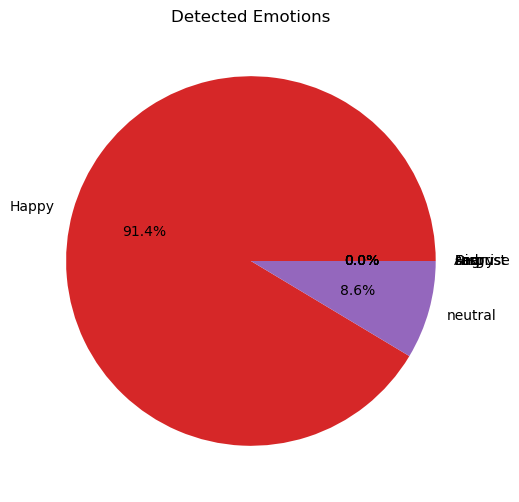

In [2]:
import cv2
import numpy as np
from keras.models import load_model
import time
import matplotlib.pyplot as plt
#import emoji
# Load the haarcascade and my_mental_health models
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
my_mental_health= load_model('my_mental_health2.h5')
# add the emotions labels (same order like the data)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'neutral', 'sad', 'surprise']
detected_emotions = []# list to collect the detected emotions 
# Start webcam
#capture = cv2.VideoCapture(0)
#trying with other video for testing
capture = cv2.VideoCapture(r"C:\Users\sarra\Downloads\Almuth without glasses.mp4")
while True:
    yes, frame = capture.read()
    if not yes:#this yes is a boolean variable that =false is there is no frame 
        break

    # Convert the frame to gray scale(like the fitting data)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        # Crop face region in same size as the images in the data
        image_gray = gray[y:y+h, x:x+w]
        image_gray = cv2.resize(image_gray, (48, 48), interpolation=cv2.INTER_AREA)

        # Normalize pixel values
        image_gray = image_gray / 255.0

        # Reshape for model input
        image_gray = np.reshape(image_gray, (1, 48, 48, 1))
        # Predict emotion
        prediction = my_mental_health.predict(image_gray)
        emotion_index = np.argmax(prediction)
        emotion = emotion_labels[emotion_index]
        detection_time = time.strftime('%Y-%m-%d %H:%M:%S')#time of every detected emotion
        detected_emotions.append((emotion, detection_time))# add every detected emotion to a list with the time
        # Draw bounding box and emotion label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)#if i want to drow a rectangle 
        #center = (int(x + w/2), int(y + h/2))
        #radius = int((w + h) / 4)
        #cv2.circle(frame, center, radius, (255, 0, 0), 2)#if i want to drow a circle
        
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)#display the label
        

    # Display the frame
    cv2.imshow('My_mental_health', frame)

    # Exit loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    #time.sleep(1)#take a capture every second
# Release resources
capture.release()
cv2.destroyAllWindows()
emotions = [emotion for emotion, _ in detected_emotions]
detection_times = [detection_time for _, detection_time in detected_emotions]
# Plot the detected emotions
plt.figure(figsize=(8, 6))
emotions_count = len(emotions)
emotion_counts = [emotions.count(emotion) for emotion in emotion_labels]
emotion_percentages = [count / emotions_count * 100 for count in emotion_counts]

plt.pie(emotion_percentages, labels=emotion_labels, autopct='%1.1f%%')
plt.title('Detected Emotions')
plt.show()    


In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
